In [47]:
import pandas as pd
import mglearn
import preamble
#순서. preamble이 나중이어야함

In [48]:
from preamble import *

### 주식 + (a) => 수익률이 가장 높은 포트폴리오를 구성하시오.

> 라고 했을 때, 접근의 문제

> a(채권, etf, 금  etc..)가 들어있는 모든 값들을 반영한 수익률 y 가 나와있는게 아니기 때문에

> 지도학습이 아니라 y 답안지가 없는 = 비지도학습으로 접근해야 한다

> https://github.com/FinanceData/FinanceDataReader / pip install finance-datareader

> problem 1. 인덱스가 날짜네... 

> problem 2. 날짜-> 미장이랑 국장 쉬는 날이 달라서 비교할때 Na값이 생겨서 데이터에 영향을 주네...

### 데이터 수집

> 가져올 애들 정한다

> 가져온 데이터 섞어야되는데 어떻게 전처리할지 싹 본다 

In [26]:
import FinanceDataReader as fdr

#비지도학습 해결하기 위해 -> 내가 a 안에 섞을 애들을 가져온다. 저 크고 큰 데이터셋에서 내가 필요로 하는 데이터셋 추려오기

# 한국 주식
# 미국 주식
# 일본 주식
# 달러 / 원화 
# 비트코인 / 원화
# 10년 만기 미국국채 수익률

### 전략

> 헤드를 보니까 10년치가 안돼. 얘때문에 7년으로 다 맞춰서 7년치 데이터를 쓰기로

> 7년치 데이터를 모아서 합계를 데이터 전처리하기로 하고 날짜 파라미터 주고 변수에 할당해줌

> 어떤 column만 가져올지 - open. high. low. close

> 인덱스가 Datetime 시계열 인덱스이기때문에 절대 겹치게 merge할 수 없음 

> but 합칠 때 데이터셋들이 Column이 절대 겹치지 않게 주의해야 함

> rolling, apply, 내 커스텀함수 적용

In [27]:
ks11=fdr.DataReader('KS11', '2016-01-01', '2023-12-31')
ks11
#파라미터 KS11 한국코스피지수 

1 001 2016-01-01 00:00:00 2017-12-31 00:00:00
1 001 2018-01-01 00:00:00 2019-12-31 00:00:00
1 001 2020-01-01 00:00:00 2021-12-31 00:00:00
1 001 2022-01-01 00:00:00 2023-12-31 00:00:00


,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2016-01-04,1954.47,1954.52,1918.76,1918.76,359018283,-0.0217,2,-42.55,3966273691160,1215384387196179
2016-01-05,1911.93,1937.57,1911.93,1930.53,446548849,0.0061,1,11.77,4197593667227,1222621740423229
2016-01-06,1934.25,1934.25,1911.61,1925.43,594612859,-0.0026,2,-5.10,6274716917514,1219296930268774
2016-01-07,1915.71,1926.41,1901.24,1904.33,393042046,-0.0110,2,-21.10,5003024735272,1205546061634302
2016-01-08,1889.42,1918.25,1883.82,1917.62,430204496,0.0070,1,13.29,5205453870899,1213738732721558
...,...,...,...,...,...,...,...,...,...,...
2023-12-21,2598.37,2610.81,2587.16,2600.02,578334789,-0.0055,2,-14.28,9467808991589,2080482827882262
2023-12-22,2617.72,2621.37,2599.51,2599.51,465967201,-0.0002,2,-0.51,8848287882829,2082855844704432
2023-12-26,2609.44,2612.14,2594.65,2602.59,440428129,0.0012,1,3.08,9582765574870,2085608165140366


In [28]:
ixic=fdr.DataReader('IXIC','2016-01-01', '2023-12-31')
ixic

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,4897.649902,4903.089844,4846.979980,4903.089844,4903.089844,2218420000
2016-01-05,4917.839844,4926.729980,4872.740234,4891.430176,4891.430176,1927380000
2016-01-06,4813.759766,4866.040039,4804.689941,4835.759766,4835.759766,2168620000
2016-01-07,4736.399902,4788.020020,4688.169922,4689.430176,4689.430176,2552590000
2016-01-08,4722.020020,4742.569824,4637.850098,4643.629883,4643.629883,2288750000
...,...,...,...,...,...,...
2023-12-22,15006.179688,15047.190430,14927.120117,14992.969727,14992.969727,4796600000
2023-12-26,15028.690430,15101.179688,15024.059570,15074.570313,15074.570313,6120600000
2023-12-27,15089.660156,15114.080078,15051.669922,15099.179688,15099.179688,7480170000


In [29]:
n225=fdr.DataReader('N225','2016-01-01', '2023-12-31')
n225

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,18818.580078,18951.119141,18394.429688,18450.980469,18450.980469,140200000.0
2016-01-05,18398.759766,18547.380859,18327.519531,18374.000000,18374.000000,132300000.0
2016-01-06,18410.570313,18469.380859,18064.300781,18191.320313,18191.320313,142200000.0
2016-01-07,18139.769531,18172.039063,17767.339844,17767.339844,17767.339844,168000000.0
2016-01-08,17562.230469,17975.310547,17509.640625,17697.960938,17697.960938,184300000.0
...,...,...,...,...,...,...
2023-12-25,33414.511719,33414.511719,33221.570313,33254.031250,33254.031250,58900000.0
2023-12-26,33295.679688,33312.261719,33181.359375,33305.851563,33305.851563,68300000.0
2023-12-27,33532.968750,33755.750000,33521.519531,33681.238281,33681.238281,93700000.0


In [30]:
usd_krw=fdr.DataReader('USD/KRW','2016-01-01', '2023-12-31')
usd_krw

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,1174.109985,1174.109985,1172.199951,1174.109985,1174.109985,0.0
2016-01-04,1174.109985,1191.530029,1174.109985,1174.109985,1174.109985,0.0
2016-01-05,1188.900024,1191.959961,1183.000000,1187.359985,1187.359985,0.0
2016-01-06,1189.479980,1200.949951,1185.550049,1188.719971,1188.719971,0.0
2016-01-07,1198.680054,1203.199951,1189.900024,1198.739990,1198.739990,0.0
...,...,...,...,...,...,...
2023-12-25,1297.359985,1298.359985,1295.030029,1297.359985,1297.359985,0.0
2023-12-26,1294.579956,1299.300049,1284.760010,1294.579956,1294.579956,0.0
2023-12-27,1293.920044,1295.760010,1290.000000,1293.920044,1293.920044,0.0


In [31]:
us10yt=fdr.DataReader('US10YT','2016-01-01', '2023-12-31') # 10년 만기 미국국채 수익률
us10yt

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,2.230,2.245,2.200,2.245,2.245,0.0
2016-01-05,2.243,2.261,2.225,2.248,2.248,0.0
2016-01-06,2.191,2.209,2.176,2.177,2.177,0.0
2016-01-07,2.163,2.200,2.153,2.153,2.153,0.0
...,...,...,...,...,...,...
2023-12-25,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-26,3.908,3.908,3.882,3.886,3.886,0.0
2023-12-27,3.852,3.852,3.785,3.789,3.789,0.0


In [32]:
btc_krw = fdr.DataReader('BTC/KRW','2016-01-01', '2023-12-31') # 비트코인/원화
btc_krw 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,5.060929e+05,5.125672e+05,5.022874e+05,5.101036e+05,5.101036e+05,42607754105
2016-01-02,5.104418e+05,5.121330e+05,5.072097e+05,5.090512e+05,5.090512e+05,35346951870
2016-01-03,5.092157e+05,5.094095e+05,4.989786e+05,5.051554e+05,5.051554e+05,46559806550
2016-01-04,5.052142e+05,5.172751e+05,5.059330e+05,5.146464e+05,5.146464e+05,45723198025
2016-01-05,5.146202e+05,5.148096e+05,5.100812e+05,5.139287e+05,5.139287e+05,41073608576
...,...,...,...,...,...,...
2023-12-26,5.588609e+07,5.677294e+07,5.556813e+07,5.653359e+07,5.653359e+07,27371377811487
2023-12-27,5.651636e+07,5.652068e+07,5.401219e+07,5.495770e+07,5.495770e+07,38809762065013
2023-12-28,5.495520e+07,5.654604e+07,5.456283e+07,5.629107e+07,5.629107e+07,32731860628340


In [33]:
ixic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2012 entries, 2016-01-04 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2012 non-null   float64
 1   High       2012 non-null   float64
 2   Low        2012 non-null   float64
 3   Close      2012 non-null   float64
 4   Adj Close  2012 non-null   float64
 5   Volume     2012 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


In [34]:
ks11.head()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2016-01-04,1954.47,1954.52,1918.76,1918.76,359018283,-0.0217,2,-42.55,3966273691160,1215384387196179
2016-01-05,1911.93,1937.57,1911.93,1930.53,446548849,0.0061,1,11.77,4197593667227,1222621740423229
2016-01-06,1934.25,1934.25,1911.61,1925.43,594612859,-0.0026,2,-5.10,6274716917514,1219296930268774
2016-01-07,1915.71,1926.41,1901.24,1904.33,393042046,-0.0110,2,-21.10,5003024735272,1205546061634302
2016-01-08,1889.42,1918.25,1883.82,1917.62,430204496,0.0070,1,13.29,5205453870899,1213738732721558


In [35]:
ks11.rolling(window=2).sum()
#rolling-인덱스 기준 앞에 놈이랑 자기 합계를 뱉어주는데
#4일은 앞에 3일이 없으니까 3+4가 안되어서 Nan뜨자너

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,3866.40,3892.09,3830.69,3849.29,8.055671e+08,-0.0156,3.0,-30.78,8.163867e+12,2.438006e+15
2016-01-06,3846.18,3871.82,3823.54,3855.96,1.041162e+09,0.0035,3.0,6.67,1.047231e+13,2.441919e+15
2016-01-07,3849.96,3860.66,3812.85,3829.76,9.876549e+08,-0.0136,4.0,-26.20,1.127774e+13,2.424843e+15
2016-01-08,3805.13,3844.66,3785.06,3821.95,8.232465e+08,-0.0040,3.0,-7.81,1.020848e+13,2.419285e+15
...,...,...,...,...,...,...,...,...,...,...
2023-12-21,5185.36,5226.19,5172.01,5214.32,1.148758e+09,0.0123,3.0,31.47,2.067035e+13,4.171651e+15
2023-12-22,5216.09,5232.18,5186.67,5199.53,1.044302e+09,-0.0057,4.0,-14.79,1.831610e+13,4.163339e+15
2023-12-26,5227.16,5233.51,5194.16,5202.10,9.063953e+08,0.0010,3.0,2.57,1.843105e+13,4.168464e+15


In [36]:
def my_fun(x):
     return x.iloc[1]-x.iloc[0]
#뒤에서 앞에거 뺀값 구하기 위해서 커스텀함수 가져와서 적용해본다.

ks11['Close'].rolling(window=2).apply(my_fun)

Date
2016-01-04      NaN
2016-01-05    11.77
2016-01-06    -5.10
2016-01-07   -21.10
2016-01-08    13.29
              ...  
2023-12-21   -14.28
2023-12-22    -0.51
2023-12-26     3.08
2023-12-27    10.91
2023-12-28    41.78
Name: Close, Length: 1966, dtype: float64

## 예제

> 주식을 비롯해서 자산가치를 형성하는 몇몇 방법이 있다. 이 때, 투자 안정성을 위해서 분산투자를 하려고 한다. 우리가 주식을 투자 방법으로 결정하고, 나머지 포트폴리오를 구성하는 방법을 결정하세요. 단, 수익율이 가장 높은 포트폴리오를 구성해주세요.

- https://github.com/FinanceData/FinanceDataReader

import FinanceDataReader as fdr

### 데이터 수집

In [37]:
ks11 = fdr.DataReader("KS11", "2016-01-01", "2023-12-31")
ixic = fdr.DataReader("IXIC", "2016-01-01", "2023-12-31")
n225 = fdr.DataReader("N225", "2016-01-01", "2023-12-31")
usd_krw = fdr.DataReader("USD/KRW", "2016-01-01", "2023-12-31")
btc_krw = fdr.DataReader("BTC/KRW", "2016-01-01", "2023-12-31")
us10yt = fdr.DataReader("US10YT", "2016-01-01", "2023-12-31")

1 001 2016-01-01 00:00:00 2017-12-31 00:00:00
1 001 2018-01-01 00:00:00 2019-12-31 00:00:00
1 001 2020-01-01 00:00:00 2021-12-31 00:00:00
1 001 2022-01-01 00:00:00 2023-12-31 00:00:00


In [38]:
ks11.head()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2016-01-04,1954.47,1954.52,1918.76,1918.76,359018283,-0.0217,2,-42.55,3966273691160,1215384387196179
2016-01-05,1911.93,1937.57,1911.93,1930.53,446548849,0.0061,1,11.77,4197593667227,1222621740423229
2016-01-06,1934.25,1934.25,1911.61,1925.43,594612859,-0.0026,2,-5.10,6274716917514,1219296930268774
2016-01-07,1915.71,1926.41,1901.24,1904.33,393042046,-0.0110,2,-21.10,5003024735272,1205546061634302
2016-01-08,1889.42,1918.25,1883.82,1917.62,430204496,0.0070,1,13.29,5205453870899,1213738732721558


In [39]:
def my_fun(x):
    return x.iloc[1] - x.iloc[0]


ks11["Close"].rolling(window=2).apply(my_fun)

Date
2016-01-04      NaN
2016-01-05    11.77
2016-01-06    -5.10
2016-01-07   -21.10
2016-01-08    13.29
              ...  
2023-12-21   -14.28
2023-12-22    -0.51
2023-12-26     3.08
2023-12-27    10.91
2023-12-28    41.78
Name: Close, Length: 1966, dtype: float64

### 데이터 전처리

In [40]:
kospi = fdr.DataReader("KS11", "2016-01-01", "2023-12-31")
kospi["Change"] = kospi["Change"] * 100
kospi = kospi.drop(
    ["Open", "High", "Low", "Close", "Volume", "UpDown", "Comp", "Amount", "MarCap"],
    axis=1,
)
kospi.rename(columns={"Change": "KOSPI"}, inplace=True)
kospi.head()

1 001 2016-01-01 00:00:00 2017-12-31 00:00:00
1 001 2018-01-01 00:00:00 2019-12-31 00:00:00
1 001 2020-01-01 00:00:00 2021-12-31 00:00:00
1 001 2022-01-01 00:00:00 2023-12-31 00:00:00


,KOSPI
Date,
2016-01-04,-2.17
2016-01-05,0.61
2016-01-06,-0.26
2016-01-07,-1.10
2016-01-08,0.70


In [41]:
nasdaq = fdr.DataReader("IXIC", "2016-01-01", "2023-12-31")
nasdaq["Change"] = round(nasdaq["Adj Close"].pct_change() * 100, 2)
nasdaq = nasdaq.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
nasdaq.rename(columns={"Change": "NASDAQ"}, inplace=True)
nasdaq

,NASDAQ
Date,
2016-01-04,NaN
2016-01-05,-0.24
2016-01-06,-1.14
2016-01-07,-3.03
2016-01-08,-0.98
...,...
2023-12-22,0.19
2023-12-26,0.54
2023-12-27,0.16


In [42]:
usa_treasury = fdr.DataReader("US10YT", "2016-01-01", "2023-12-31")
usa_treasury["Change"] = round(usa_treasury["Adj Close"].pct_change() * 100, 2)
usa_treasury = usa_treasury.drop(
    ["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1
)
usa_treasury = usa_treasury.rename(columns={"Change": "USA_TREASURY"})
usa_treasury

C:\Users\user\AppData\Local\Temp\ipykernel_16060\187267961.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  usa_treasury["Change"] = round(usa_treasury["Adj Close"].pct_change() * 100, 2)


,USA_TREASURY
Date,
2016-01-01,NaN
2016-01-04,NaN
2016-01-05,0.13
2016-01-06,-3.16
2016-01-07,-1.10
...,...
2023-12-25,0.00
2023-12-26,-0.38
2023-12-27,-2.50


In [43]:
japan = fdr.DataReader("N225", "2001-06-08", "2024-01-23")
japan["Change"] = round(japan["Adj Close"].pct_change() * 100, 2)
japan = japan.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
japan.rename(columns={"Change": "Nikkei"}, inplace=True)
japan

C:\Users\user\AppData\Local\Temp\ipykernel_16060\3238539496.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  japan["Change"] = round(japan["Adj Close"].pct_change() * 100, 2)


,Nikkei
Date,
2001-06-08,NaN
2001-06-11,-1.52
2001-06-12,-2.92
2001-06-13,-0.13
2001-06-14,0.18
...,...
2024-01-16,-0.79
2024-01-17,-0.40
2024-01-18,-0.03


In [44]:
usd_krw = fdr.DataReader("USD/KRW", "2016-01-01", "2023-12-31")
usd_krw["Change"] = round(usd_krw["Adj Close"].pct_change() * 100, 2)
usd_krw = usd_krw.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
usd_krw = usd_krw.rename(columns={"Change": "USD/KRW"})
usd_krw

C:\Users\user\AppData\Local\Temp\ipykernel_16060\3698897066.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  usd_krw["Change"] = round(usd_krw["Adj Close"].pct_change() * 100, 2)


,USD/KRW
Date,
2016-01-01,NaN
2016-01-04,0.00
2016-01-05,1.13
2016-01-06,0.11
2016-01-07,0.84
...,...
2023-12-25,0.44
2023-12-26,-0.21
2023-12-27,-0.05


In [45]:
btc_krw = fdr.DataReader("BTC/KRW", "2016-01-01", "2023-12-31")
btc_krw["Change"] = round(btc_krw["Adj Close"].pct_change() * 100, 2)
btc_krw = btc_krw.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
btc_krw = btc_krw.rename(columns={"Change": "BTC/KRW"})
btc_krw

,BTC/KRW
Date,
2016-01-01,NaN
2016-01-02,-0.21
2016-01-03,-0.77
2016-01-04,1.88
2016-01-05,-0.14
...,...
2023-12-26,1.15
2023-12-27,-2.79
2023-12-28,2.43


### 데이터 병합

In [49]:
result_data = pd.concat([kospi, nasdaq, usd_krw, usa_treasury, japan, btc_krw], axis=1)
result_data.fillna(result_data.mean(), inplace=True)
result_data = round(result_data, 2)

In [50]:
result_data.to_csv("kospi_result_data.csv")

In [51]:
result_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6586 entries, 2001-06-08 to 2024-01-22
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   KOSPI         6586 non-null   float64
 1   NASDAQ        6586 non-null   float64
 2   USD/KRW       6586 non-null   float64
 3   USA_TREASURY  6586 non-null   float64
 4   Nikkei        6586 non-null   float64
 5   BTC/KRW       6586 non-null   float64
dtypes: float64(6)
memory usage: 360.2 KB


### 비지도학습

1. X, y 정하기 
  
     > y가 없는게 아니고 내가 정해야 하는게 비지도학습임

     > 내가 가설을 정하고, 의도를 가지고 시작하는거임 (ex-코스피를 추종한다)

2. 알고리즘 정하기

     > KMeans가 빠른 속도로 나옴 - n_clusters 3개 또는 4개가 성능이 가장 좋음 

3. t-SNE 으로 KMeans 분류 결과 시각적으로 확인하기

     > 시각적으로 어떻게 분류될 수 있는지 반드시 확인하기

     > 왜냐면 내가 KMeans에 3개 4개로 분류해달라 해도 컴퓨터는 2개로 분류할수 있기 때문에.

In [58]:
from sklearn.cluster import KMeans

In [52]:
# 내가 y를 답으로 정한거야. 내답이 KOSPI를 따라갔으면 좋겠거든
# KOSPI를 추종했으면해 그래서 X에서는 drop하고 y를 KOSPI로 정한거야
X = result_data.drop("KOSPI", axis=1)
y = result_data["KOSPI"]

In [59]:
#클러스터 갯수 잡아보기 위해 클러스터갯수 for문돌려서 모델 학습시키고 그래프 만들어봄

ks = range(1, 10)
inertias = []
for k in ks : #1부터 9까지 하나씩 cluster 해가면서 KMeans를 학습시켜보고, X를 훈련시켜봄
     model = KMeans(n_clusters=k, random_state=42)
     model.fit(X)
     inertias.append(model.inertia_) #빈 리스트에 append함  


#inertia는 클러스터의 중심(centroid)과 클러스터에 속하는 데이터 포인트 간의 거리의 제곱합 낮을수록 좋것지 

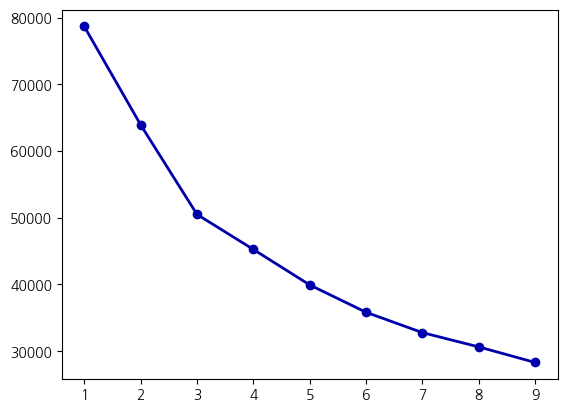

In [60]:
plt.plot(ks, inertias, "-o")
#평균 중앙에 있는 값 3.4 스무스하잔아
#9 이후는 어차피 0에 가깝게 계속 피팅될거임

In [68]:
n_clusters=4 #이면 내가 그 데이터 포인터들을 0,1,2,3 으로 나누겠다는 말
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans[1:10]

array([0, 0, 0, 0, 0, 0, 0, 2, 2])

In [73]:
from sklearn.manifold import TSNE

#components=2는 2차원으로 축소해서 보여달라는말 -> 2열으로 나옴 
tsne = TSNE(n_components=2, verbose=1, perplexity=32, n_iter=1000, angle=0.5, random_state=42)

tsne_result = tsne.fit_transform(X)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 97 nearest neighbors...
[t-SNE] Indexed 6586 samples in 0.005s...
[t-SNE] Computed neighbors for 6586 samples in 0.221s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6586
[t-SNE] Computed conditional probabilities for sample 2000 / 6586
[t-SNE] Computed conditional probabilities for sample 3000 / 6586
[t-SNE] Computed conditional probabilities for sample 4000 / 6586
[t-SNE] Computed conditional probabilities for sample 5000 / 6586
[t-SNE] Computed conditional probabilities for sample 6000 / 6586
[t-SNE] Computed conditional probabilities for sample 6586 / 6586
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.768028
[t-SNE] KL divergence after 1000 iterations: 0.489747


In [64]:
tsne_result

array([[-35.483, -39.674],
       [ -3.876, -53.62 ],
       [ 48.512, -69.789],
       ...,
       [-73.5  , -36.71 ],
       [ 25.363,  80.364],
       [ 49.168,  63.403]], dtype=float32)

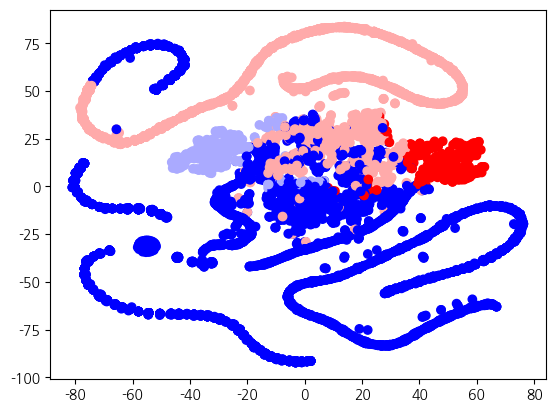

In [69]:
#컴포넌트 내가 두개 달라했잖아 그러니까 tsne_result는 x갯수만큼의 행, 2열 이거든 (x,2)
#내가 n_cluster=4로 설정했기 때문에 0,1,2,3 으로 나눠질수있어서 4개의 색이 나올거임
plt.scatter(tsne_result[:,0], tsne_result[:, 1], c=y_kmeans, cmap="bwr") #컬러맵에 우리가 분류한 y_kmeans로. 그래야 분류된 클래스만큼 나옴 

In [70]:
result_data

,KOSPI,NASDAQ,USD/KRW,USA_TREASURY,Nikkei,BTC/KRW
Date,,,,,,
2001-06-08,0.02,0.07,0.01,0.08,0.03,0.23
2001-06-11,0.02,0.07,0.01,0.08,-1.52,0.23
2001-06-12,0.02,0.07,0.01,0.08,-2.92,0.23
2001-06-13,0.02,0.07,0.01,0.08,-0.13,0.23
2001-06-14,0.02,0.07,0.01,0.08,0.18,0.23
...,...,...,...,...,...,...
2024-01-16,0.02,0.07,0.01,0.08,-0.79,0.23
2024-01-17,0.02,0.07,0.01,0.08,-0.40,0.23
2024-01-18,0.02,0.07,0.01,0.08,-0.03,0.23


In [74]:
df1=result_data.copy()

In [78]:
df1["cluster"]=y_kmeans
df1.head(n=10)

,KOSPI,NASDAQ,USD/KRW,USA_TREASURY,Nikkei,BTC/KRW,cluster
Date,,,,,,,
2001-06-08,0.02,0.07,0.01,0.08,0.03,0.23,0
2001-06-11,0.02,0.07,0.01,0.08,-1.52,0.23,0
2001-06-12,0.02,0.07,0.01,0.08,-2.92,0.23,0
2001-06-13,0.02,0.07,0.01,0.08,-0.13,0.23,0
2001-06-14,0.02,0.07,0.01,0.08,0.18,0.23,0
2001-06-15,0.02,0.07,0.01,0.08,-0.44,0.23,0
2001-06-18,0.02,0.07,0.01,0.08,-0.72,0.23,0
2001-06-19,0.02,0.07,0.01,0.08,-0.97,0.23,0
2001-06-20,0.02,0.07,0.01,0.08,0.80,0.23,2


In [82]:
cluster_0 = df1[df1["cluster"]==0]
cluster_1 = df1[df1["cluster"]==1]
cluster_2 = df1[df1["cluster"]==2]

In [83]:
#클러스터 특성 요약
cluster_total = df1.groupby("cluster").mean() 
cluster_total["return"] = cluster_total.T.mean() #행렬뒤집어 평균
cluster_total["std"]=cluster_total.T.std() #분산
cluster_total = cluster_total.T
cluster_total

cluster,0,1,2,3
KOSPI,-0.03,4.01e-02,1.47e-01,-0.13
NASDAQ,0.05,-3.51e-01,1.45e-01,0.27
USD/KRW,0.02,-5.85e-02,-6.42e-03,0.05
USA_TREASURY,-0.20,-2.09e-01,7.69e-01,-0.05
Nikkei,-0.53,6.53e-03,1.28e+00,-0.13
BTC/KRW,0.21,-5.99e+00,1.84e-01,6.26
return,-0.08,-1.09e+00,4.20e-01,1.04
std,0.24,2.19e+00,4.56e-01,2.34
